# Training Plant Leaf Classifier
COMP 473 Project


# Training

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
import pandas as pd
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [48]:
#@title Hyperparameters
learning_rate = 0.001
batch_size = 32
total_epochs = 30
output_features = 44

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [61]:
#@title setup data loader
# Transformations of images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#load data
train_dataset = ImageFolder('./train', transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
len(train_dataloader.dataset)

2288

In [49]:
#@title Load Model
model = models.resnet50(weights='IMAGENET1K_V1')
model.fc = nn.Linear(model.fc.in_features, output_features)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
train_losses, train_accuracies = [], []

In [50]:
#@title Training loop

for epoch in range(total_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    train_predictions, train_labels = [], []

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        predictions = model(images)
        loss = criterion(predictions, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss
        running_loss += loss.item()

        # Store predictions and labels for accuracy calculation
        _, predicted = torch.max(predictions, 1)
        train_predictions.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate training metrics
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)

    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{total_epochs}], Loss: {epoch_loss:.4f}")   

Epoch [1/30], Loss: 3.6165
Epoch [2/30], Loss: 2.3393
Epoch [3/30], Loss: 1.7132
Epoch [4/30], Loss: 1.3335
Epoch [5/30], Loss: 1.1496
Epoch [6/30], Loss: 0.8991
Epoch [7/30], Loss: 0.6911
Epoch [8/30], Loss: 0.6698
Epoch [9/30], Loss: 0.6272
Epoch [10/30], Loss: 0.6222
Epoch [11/30], Loss: 0.4691
Epoch [12/30], Loss: 0.4364
Epoch [13/30], Loss: 0.2805
Epoch [14/30], Loss: 0.2983
Epoch [15/30], Loss: 0.2927
Epoch [16/30], Loss: 0.1858
Epoch [17/30], Loss: 0.1454
Epoch [18/30], Loss: 0.1137
Epoch [19/30], Loss: 0.0933
Epoch [20/30], Loss: 0.0764
Epoch [21/30], Loss: 0.1010
Epoch [22/30], Loss: 0.1110
Epoch [23/30], Loss: 0.0734
Epoch [24/30], Loss: 0.1193
Epoch [25/30], Loss: 0.1500
Epoch [26/30], Loss: 0.0964
Epoch [27/30], Loss: 0.0724
Epoch [28/30], Loss: 0.0732
Epoch [29/30], Loss: 0.1643
Epoch [30/30], Loss: 0.1304


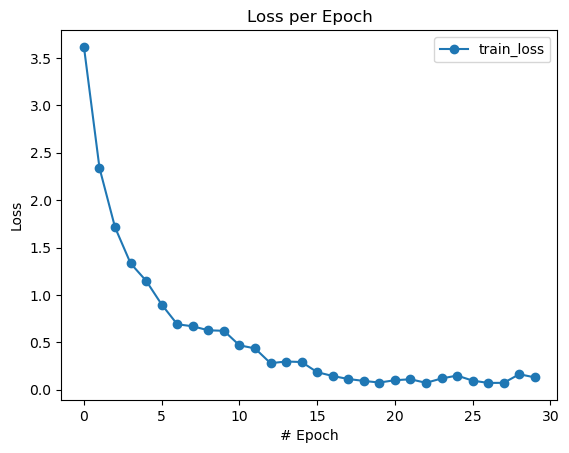

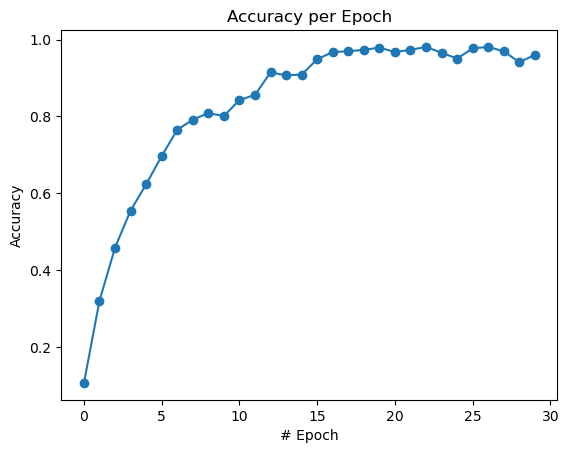

In [55]:
def plot_loss(num_epochs, losses):
    epochs = np.arange(0,num_epochs)
    plt.plot(epochs, losses, '-o', label='train_loss')
    plt.title('Loss per Epoch')
    plt.xlabel('# Epoch')
    plt.ylabel('Loss')
    plt.grid(False)
    plt.legend()
    plt.show()

def plot_accuracy(num_epochs, accuracies):
    epochs = np.arange(0,num_epochs)
    plt.plot(epochs, accuracies, '-o')
    plt.title('Accuracy per Epoch')
    plt.xlabel('# Epoch')
    plt.ylabel('Accuracy')
    plt.grid(False)
    plt.show()
plot_loss(total_epochs, train_losses)
plot_accuracy(total_epochs, train_accuracies)

# Testing

In [22]:
#load data
test_dataset = ImageFolder('./test', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
len(test_dataloader.dataset)

528

In [28]:
import torch
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
def plot_confusion_matrix(true_labels, pred_labels, class_names):
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(10, 9))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [29]:
def test_model(model, test_loader, device, class_names):
    model.eval()
    test_predictions = []
    test_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Get model outputs and predictions
            predictions = model(images)
            _, predicted = torch.max(predictions, 1)

            # Collect predictions, and labels
            test_predictions.extend(predicted.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    
    print(accuracy_score(test_labels, test_predictions))

    # Plot confusion matrix
    plot_confusion_matrix(test_labels, test_predictions, class_names=class_names)

0.9715909090909091


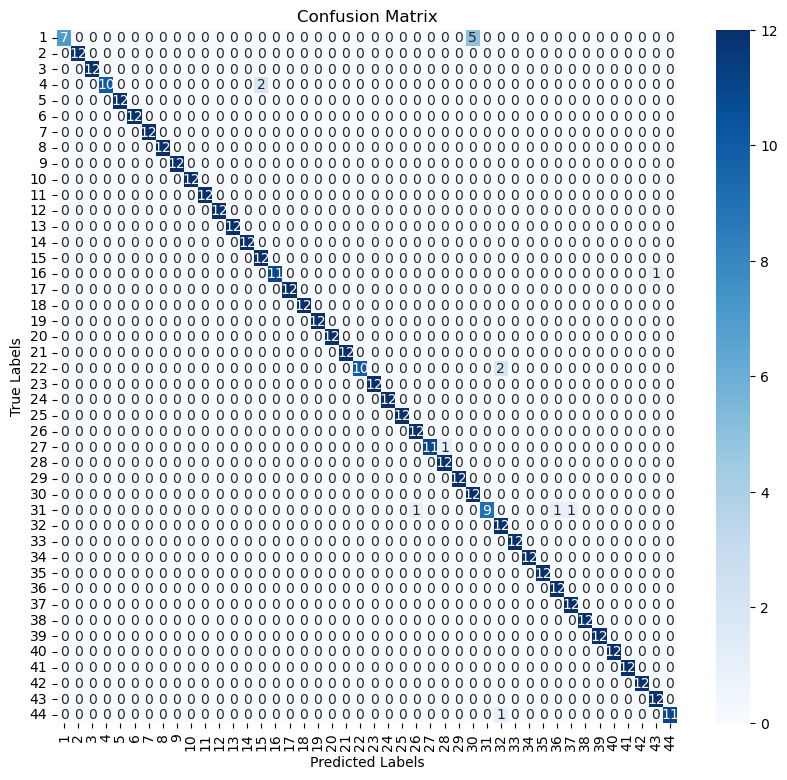

In [66]:
class_numbers = np.arange(1,45,dtype=int)
class_names = class_numbers.astype(str)
test_model(model, test_dataloader, device, class_names)